# The Sharpe Ratio

## Introduction

<p> The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.</p>

$$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $$
    
### **Where** 

$$ R_p = \text{return of portfolio} $$
$$ R_f = \text{Risk-free rate} $$
$$ \sigma_p = \text{Standard deviation of portfolio's excess return} $$

<br>

<p> The Sharpe Ratio allows investors to measure how well an asset will perform for the risk taken. Two assets are compared against a common benhcmark, the asset with the higher Sharpe Ratio will provide better returns for the same risk. In this workbook I will be comparing Amazon and Tesla against the S&P 500 as the benchmark. The time period used is 18/11/20 to 18/11/21</p>

[Source](https://www.investopedia.com/terms/s/sharperatio.asp)

## 1.1 Preparing the Data: Importing Modules and Reading Data

In [10]:
#Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting Plot Style
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock_data = pd.read_csv('Amazon & Tesla 2020-2021.csv', parse_dates=['Date'], index_col=['Date']).dropna()
benchmark_data = pd.read_csv('S&P 500 2020-2021.csv', parse_dates=['Date'], index_col=['Date']).dropna()




## 2.1 A First Glance: Summary of the Data

In [11]:
# Display summary for stock_data
print('Stocks\n')
stock_data.info()
print(stock_data.head()) 

# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
print(benchmark_data.head())



Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-18 to 2020-11-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amazon  252 non-null    float64
 1   Tesla   252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
             Amazon    Tesla
Date                        
2021-11-18  3696.06  1096.38
2021-11-17  3549.00  1089.01
2021-11-16  3540.70  1054.73
2021-11-15  3545.68  1013.39
2021-11-12  3525.15  1033.42

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-18 to 2020-11-19
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
            S&P 500
Date               
2021-11-18  4704.54
2021-11-17  4688.67
2021-11-16  4700.90
2021-11-15  4682.80
2021-11-12  4682.85


## 2.2 A First Glance: Plotting Amazon and Facebook

,Amazon,Tesla
count,252.000000,252.000000
mean,3312.793730,730.586825
std,160.682535,135.398559
min,2951.950000,489.610000
25%,3197.342500,646.160000
50%,3300.490000,698.970000
75%,3416.357500,781.365000
max,3731.410000,1229.910000


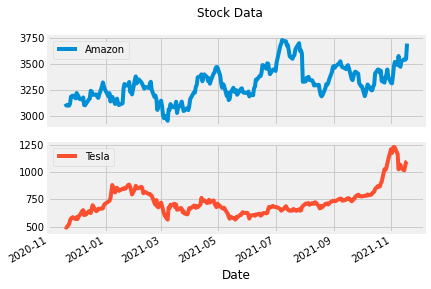

In [12]:
# visualize the stock_data
stock_data.plot(subplots=True, title='Stock Data')

# summarize the stock_data
stock_data.describe()

## 2.3 A First Glance: Plotting the S&P 500

,S&P 500
count,252.000000
mean,4158.739603
std,303.967528
min,3557.540000
25%,3888.562500
50%,4194.420000
75%,4403.445000
max,4704.540000


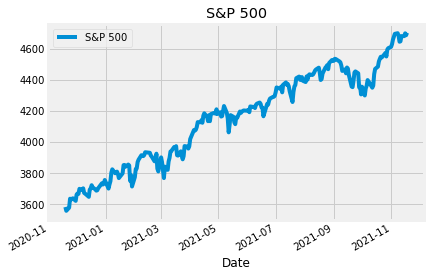

In [13]:
# plot the benchmark_data
benchmark_data.plot(title='S&P 500')

# summarize the benchmark_data
benchmark_data.describe()

### 3.1 Daily Returns: Amazon and Facebook

<bound method NDFrame.describe of               Amazon     Tesla
Date                          
2021-11-18       NaN       NaN
2021-11-17 -0.039788 -0.006722
2021-11-16 -0.002339 -0.031478
2021-11-15  0.001407 -0.039195
2021-11-12 -0.005790  0.019765
...              ...       ...
2020-11-25 -0.003214 -0.020076
2020-11-24 -0.021039 -0.032439
2020-11-23 -0.006308 -0.060373
2020-11-20  0.000326 -0.061780
2020-11-19  0.005685  0.019730

[252 rows x 2 columns]>

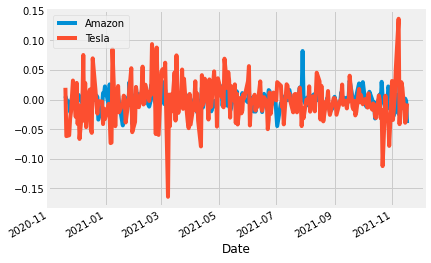

In [14]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot()

# summarize the daily returns
stock_returns.describe

### 3.2 Daily Returns: The S&P 500

count    251.000000
mean      -0.001057
std        0.007617
min       -0.023238
25%       -0.005701
50%       -0.001340
75%        0.002868
max        0.026355
Name: S&P 500, dtype: float64

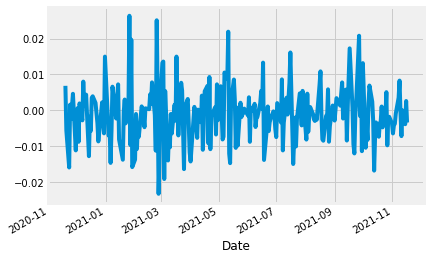

In [15]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot()

# summarize the daily returns
sp_returns.describe()

### 4.1 Calculating Excess Returns: Amazon and Facebook vs. S&P 500

,Amazon,Tesla
count,251.000000,251.000000
mean,0.000490,-0.001486
std,0.012701,0.031797
min,-0.046850,-0.150210
25%,-0.006291,-0.020053
50%,0.000722,-0.001598
75%,0.007685,0.015441
max,0.076405,0.132727


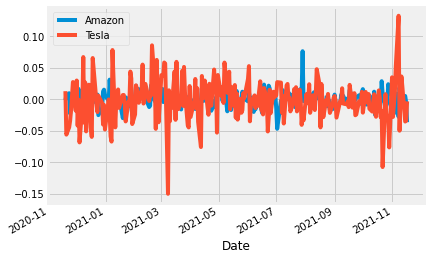

In [16]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot()

# summarize the excess_returns
excess_returns.describe()

### 5.1 The Sharpe Ratio: Calculating the average difference in daily returns for Amazon & Facebook against the S&P 500

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

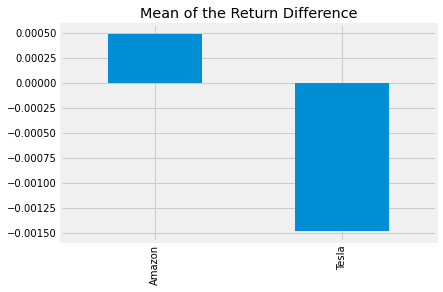

In [17]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference')

### 5.2 The Sharpe Ratio: Calculating the standard deviation of the return difference

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

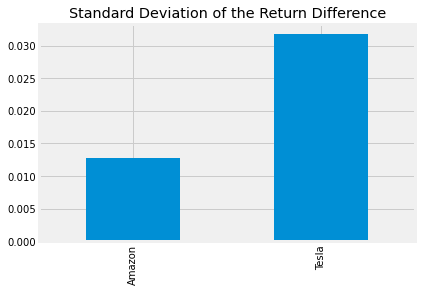

In [18]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
# ... YOUR CODE FOR TASK 9 HERE ...
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

### 5.3 The Sharpe Ratio: Calculating the Sharpe Ratio

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

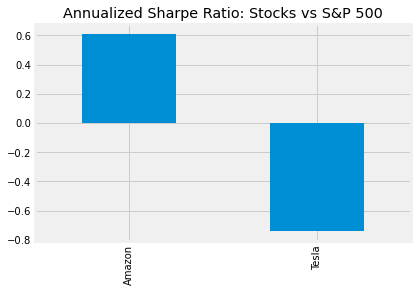

In [19]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500')

### 12. Conclusion & Limitations

<p> In 2016 Amazon had a Sharpe Ratio twice the size of Facebook. This means that an investment in Amazon would have returned twice as much as Facebook compared to the S&P 500 for the same unit of risk. In other words, in risk-adjusted terms, an investment in Amazon would have been more attractive. </p>

### **Limitations**

<p> As standard deviation of returns is used in the Sharpe Ratio it is assumed that returns are normally distributed. However, returns in financial markets are skewed from the average because of sudden large drops and spikes in prices. </p>
<p> In addition the Sharpe Ratio can be manipulated by choosing longer measurement intervals, lowering estimated volatility and boosting risk-adjusted returns. It is importnat to chose a neutral look-back period to avoid distorting the risk-adjusted returns. </p>